In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import ipywidgets as widgets
import datetime as dt
import plotly.express as px

In [151]:
basics_DF = pd.read_csv("title_basics.tsv", sep = "\t", low_memory = False)

In [153]:
akas_DF = pd.read_csv("title_akas.tsv", sep = "\t", low_memory = False)

# NETTOYAGE ET FILTRES

In [154]:
akas_DF.drop('isOriginalTitle', axis = 1, inplace = True) 
akas_DF.drop('ordering', axis = 1, inplace = True) 
akas_DF.drop('types', axis = 1, inplace = True) 
akas_DF.drop('attributes', axis = 1, inplace = True)

basics_DF.drop('originalTitle', axis = 1, inplace = True)
basics_DF.drop('endYear', axis = 1, inplace = True)

# Ajout d'une colonne "Période" pour définir les décénnies : 
basics_DF = basics_DF.dropna(subset = ['startYear'])
basics_DF = basics_DF[basics_DF['startYear'] != '\\N']
basics_DF = basics_DF.astype({"startYear": int})
basics_DF = basics_DF[basics_DF['startYear'] >= 1960 ]
basics_DF['Période'] = (basics_DF['startYear'] //10) *10

basics_DF_clean1 = basics_DF[basics_DF['runtimeMinutes'] != '\\N']
basics_DF_clean2 = basics_DF_clean1.astype({"runtimeMinutes": int})
basics_DF_clean = basics_DF_clean2[basics_DF_clean2['runtimeMinutes'] >= 60]

In [155]:
# Retourne que les 'movie' et 'tvMovie':
Movies_DF = basics_DF[basics_DF['titleType'].str.contains('Movie|movie')]

# Dropna akas_DF['region']:
Akas_country_dropna_DF = akas_DF.dropna(subset = ['region'])

# Drop Akas_country_dropna_DF['region'] !='\\N':
Akas_country_dropna_DF = Akas_country_dropna_DF[Akas_country_dropna_DF['region'] != '\\N']

# MERGE DES DF

In [156]:
# Liaison des DF Movies_DF et Akas_country_dropna_DF : 
Films_by_Country_long= pd.merge(Movies_DF,Akas_country_dropna_DF, how = 'inner', left_on=['tconst'], right_on=['titleId'])

In [157]:
Films_by_Country_long.drop('titleId', axis = 1, inplace = True) 
Films_by_Country_long.drop('title', axis = 1, inplace = True) 
Films_by_Country_long.drop('language', axis = 1, inplace = True)
Films_by_Country_long.drop('isAdult', axis = 1, inplace = True)
Films_by_Country_long.drop('tconst', axis = 1, inplace = True)
Films_by_Country_long.drop('runtimeMinutes', axis = 1, inplace = True)
Films_by_Country_long.drop('genres', axis = 1, inplace = True)
Films_by_Country_long.drop('startYear', axis = 1, inplace = True)
Films_by_Country_long.drop('primaryTitle', axis = 1, inplace = True)

In [158]:
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'WS']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'KN']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'GD']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'MS']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'MP']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'CF']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'DJ']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'SG']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'CQ']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'GQ']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'AS']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'SC']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'SB']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'VC']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'EH']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'NC']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'VU']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'AQ']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'KM']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'BW']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'DM']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'GY']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'ST']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'VA']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'LC']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'GM']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'FO']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'TL']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'TO']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'KY']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'MH']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'BZ']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'LS']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'CV']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'PF']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'TD']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'AN']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'BN']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'SZ']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'AD']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'LR']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'BM']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'GI']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'SO']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'MR']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'IM']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'RE']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'OM']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'ZM']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'AW']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'ER']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'LY']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'YE']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'GW']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'AG']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'TG']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'MQ']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'PG']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'MW']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'SR']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'GA']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'VI']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'BB']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'GN']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'MG']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'SL']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'BI']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'FJ']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'GU']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'GP']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'BJ']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'MO']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'BH']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'TM']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'GL']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'SD']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'NE']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'CD']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'SM']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'RW']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'ML']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'MC']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'CI']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'MV']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'ZW']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'BT']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'HN']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'NI']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'TJ']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'MU']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'ET']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'SV']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'JO']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'MZ']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'MM']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'TZ']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'AO']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'ME']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'BS']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'LA']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'MD']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'PS']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'TT']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'CG']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'KW']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'HT']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'KG']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'MT']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'LI']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'XSA']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'XKO']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'XKV']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'CSXX']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'VDVN']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'BUMM']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'ZRCD']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'XPI']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'XAU']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'XNA']
Films_by_Country_long = Films_by_Country_long[Films_by_Country_long['region'] != 'XWW']

In [159]:
Films_by_Country_long

,titleType,Période,region
0,movie,2010,FR
1,movie,2010,PL
2,movie,2010,PT
3,movie,2010,XWW
4,movie,2010,DE
...,...,...,...
1792447,movie,2000,CO
1792448,tvMovie,2010,PL
1792449,movie,2010,IN
1792450,movie,2010,IN


# COMPTAGE

In [171]:
# Values_count :
Films_by_Country_values = Films_by_Country_long['region'].value_counts()

In [172]:
print('Palmarès des pays selon le nombre de films distribués')
Films_by_Country_values.tail(10)

Palmarès des pays selon le nombre de films distribués


SN    140
KE    139
GH    137
BF    123
GT    116
PY    111
UG    110
JM    104
QA    104
AF    100
Name: region, dtype: int64

# GRAPHIQUES

<AxesSubplot:>

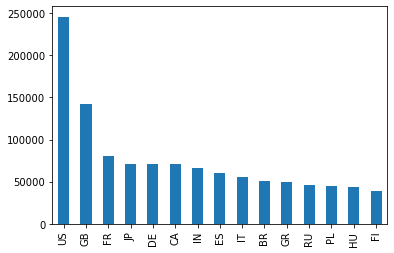

In [173]:
# Barplot Films_by_Country :
Films_by_Country_long['region'].value_counts().head(15).plot.bar()

<AxesSubplot:xlabel='region', ylabel='count'>

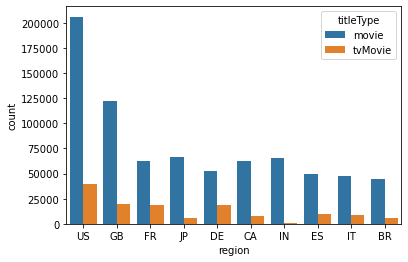

In [176]:
# countplot : 
sns.countplot(data = Films_by_Country_long, x= 'region', hue = 'titleType', order = Films_by_Country_long.region.value_counts().iloc[:10].index)

In [175]:
#compression_opts = dict(method='zip',archive_name='Country.csv') 
#Films_by_Country_long.to_csv('Country.zip', index=False,compression=compression_opts) 

In [ ]:
px.bar(Films_by_Country_long, x= 'region', color = 'titleType', y = country_DF.region.value_counts().iloc[:10].index,
            title = 'Palmarès de la distribution des oeuvres par pays ',
            labels = {'region': 'Pays'},
            width=800, height=600)